# Practice session: Abalone dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

## Load and prepare the dataset

Here, we will use the [Pandas](https://pandas.pydata.org/) package to load the .csv dataset.
More information about this dataset is available at the [OpenML](https://www.openml.org/search?type=data&sort=runs&id=183&status=active) website.

In [2]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
        'Viscera weight', 'Shell weight', 'Rings']

abalone = pd.read_csv("abalone/dataset_187_abalone.arff", header=14, names=cols)
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
1,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
2,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
3,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
4,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
...,...,...,...,...,...,...,...,...,...
4168,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4169,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4170,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4171,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


As a quick check, we will look at the type of each column and check if there is any NaN entry.

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4173 non-null   object 
 1   Length          4173 non-null   float64
 2   Diameter        4173 non-null   float64
 3   Height          4173 non-null   float64
 4   Whole weight    4173 non-null   float64
 5   Shucked weight  4173 non-null   float64
 6   Viscera weight  4173 non-null   float64
 7   Shell weight    4173 non-null   float64
 8   Rings           4173 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.5+ KB


In [4]:
abalone.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Finally, we transform the sex information, which is categorical, into a set of binary columns.
This is called one-hot encoding and could be done with Scikit-learn but for now we will use Pandas.

In [5]:
abalone = pd.get_dummies(abalone, columns=["Sex"])
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1,0
2,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1,0,0
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1,0,0
4,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4168,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4169,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4170,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4171,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


Finally, we convert the dataset into a regular set of numpy arrays.

In [6]:
feature_names = abalone.columns.drop("Rings")
X = abalone.drop(columns="Rings").values
y = abalone["Rings"].values

## Visualize the data

It's always nice to have a look at the input data.
As the data has been loaded using Pandas, we can use its [plotting API](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to visualize relationships between feature and target values.

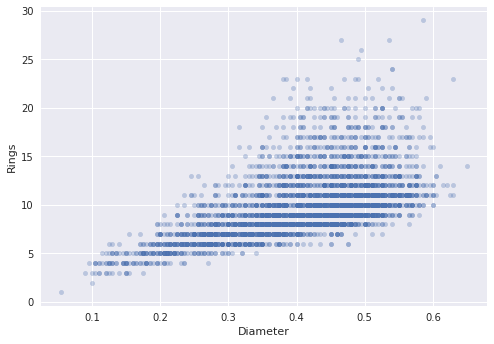

In [7]:
abalone.plot(x="Diameter", y="Rings", kind="scatter", alpha=0.3);

## And now, your turn!

Try some models to predict the number of rings (`y` variable) given the abalone features (`X` variable). Here is a reminder of the main steps that you would follow:

- split the data into train and test sets,
- import a model,
- instantiate the model,
- fit the model,
- make predictions,
- score the model on test data,
- plot the predictions vs true value (or residuals),
- rinse and repeat!

It would be even better if you use cross-validation for scoring.

In [8]:
# split your data in train and test folds, don't forget to fix the random seed
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
Xtrain.shape, Xtest.shape

((3129, 10), (1044, 10))

In [9]:
# import a model class you want to try, e.g. a linear regression
from sklearn.linear_model import LinearRegression

In [10]:
# create the model
model = LinearRegression()

In [11]:
# fit the model to the training data
model.fit(Xtrain, ytrain)

LinearRegression()

In [12]:
# generate predictions on the test data
ypred = model.predict(Xtest)

In [13]:
# import a scoring function from sklearn.metrics and compute a score on the test
# data (e.g. the root mean squared error)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred, squared=False)

2.171963087763563

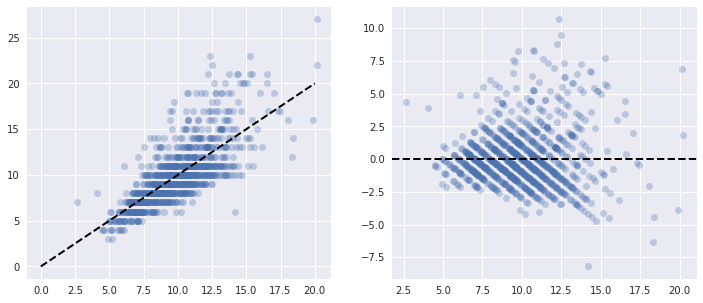

In [14]:
# plot the predicted values vs. the true values, look for any systematic bias
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(ypred, ytest, 'o', alpha=0.3)
axes[0].plot([0, 20], [0, 20], '--k', lw=2)
axes[1].plot(ypred, ytest - ypred, 'o', alpha=0.3)
axes[1].axhline(0, linestyle='--', color="k", linewidth=2)

In [15]:
pd.Series(model.coef_, index=feature_names)

Length           -1.384235e+00
Diameter          1.220156e+01
Height            1.086702e+01
Whole weight      8.402375e+00
Shucked weight   -1.924099e+01
Viscera weight   -9.438261e+00
Shell weight      8.971643e+00
Sex_F             4.008405e+13
Sex_I             4.008405e+13
Sex_M             4.008405e+13
dtype: float64

Once you have obtained some results from your first model, you can explore the following tracks:

- test another model and compare the score on the test data,
- tune the hyperparameters of your model, using `cross_val_score` on the training data,
- or even better, learn more about [automatic tuning with a grid search or a random search](https://scikit-learn.org/stable/modules/grid_search.html). 
- investigate the performances of your model, is it over-fitting or under-fitting?

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
mean_squared_error(ytest, ypred, squared=False)

2.2280539332569838

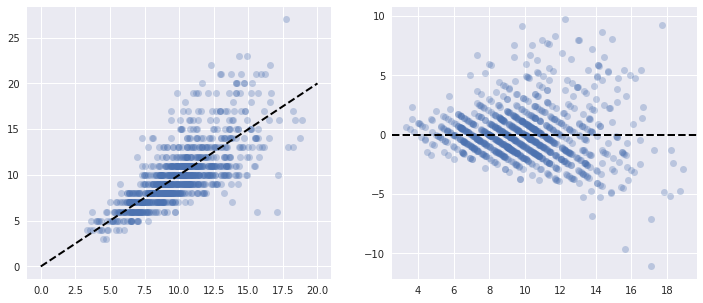

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(ypred, ytest, 'o', alpha=0.3)
axes[0].plot([0, 20], [0, 20], '--k', lw=2)
axes[1].plot(ypred, ytest - ypred, 'o', alpha=0.3)
axes[1].axhline(0, linestyle='--', color="k", linewidth=2)

In [18]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

model = RandomizedSearchCV(
    RandomForestRegressor(),
    {"n_estimators": st.randint(10, 500)},
    verbose=True,
    n_jobs=2,
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
mean_squared_error(ytest, ypred, squared=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2.2167003898758413

In [19]:
model.best_estimator_

RandomForestRegressor(n_estimators=439)

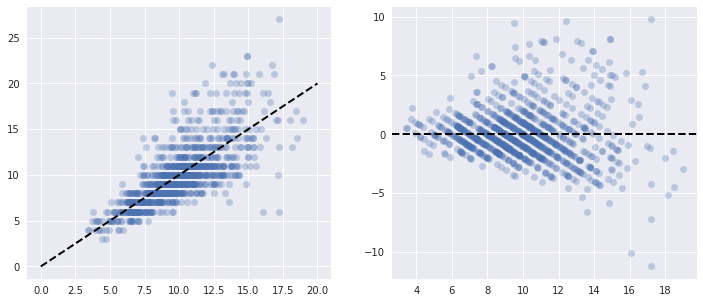

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(ypred, ytest, 'o', alpha=0.3)
axes[0].plot([0, 20], [0, 20], '--k', lw=2)
axes[1].plot(ypred, ytest - ypred, 'o', alpha=0.3)
axes[1].axhline(0, linestyle='--', color="k", linewidth=2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
accuracy_score(ytest, ypred)

0.2442528735632184

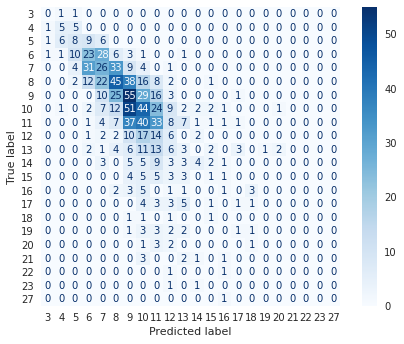

In [22]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred, cmap=plt.cm.Blues)
plt.grid(False)

## Additional challenge

Try to predict the weight given the other features ;-).

In [23]:
weight_cols = ["Shucked weight", "Viscera weight", "Shell weight", "Whole weight"]

feature_names = abalone.columns.drop(weight_cols)
X = abalone.drop(columns=weight_cols).values
y = abalone["Shucked weight"].values

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [25]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
mean_squared_error(ytest, ypred, squared=False)

0.09229496015575418

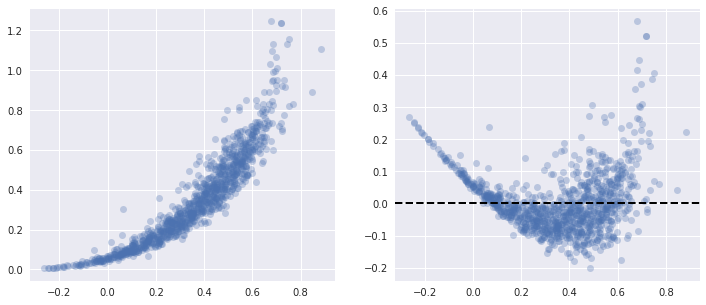

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(ypred, ytest, 'o', alpha=0.3)
axes[1].plot(ypred, ytest - ypred, 'o', alpha=0.3)
axes[1].axhline(0, linestyle='--', color="k", linewidth=2)

In [27]:
model = RandomForestRegressor()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
mean_squared_error(ytest, ypred, squared=False)

0.07611063069858087

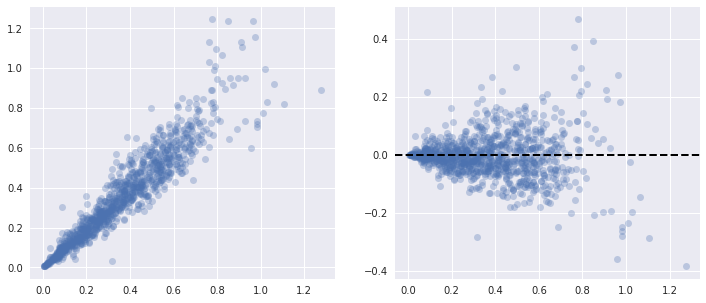

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(ypred, ytest, 'o', alpha=0.3)
axes[1].plot(ypred, ytest - ypred, 'o', alpha=0.3)
axes[1].axhline(0, linestyle='--', color="k", linewidth=2)